# Kaggle


In [6]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cryptocurrencypricehistory:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1869%2F2402293%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240625%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240625T002203Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D43e3d366f91334811c5e12e92b9bca2a09c996531c1b73f0b8c6b3321496bdbe29f72a214f26dedd29c9bf4b4166e0be82431a01610479cdbba6799901b05be215642cde073234f68883c504fbf40bb12610abffa331ea46c3bf0dd3dbc50029fcff89d02fabca029c90883c8adc446b97fe7159555172f120031fec20ab3fbd0837a514754b4e16795e46577985c17bcbd4d79df8d32e211373be8c101e2faa05f610d8f290127a08a75a979aa9906285ab1f6a4ecdd76a124f97f761d3ba74a5f7a0de43d67919a728c910c345254a00cb9a09daeab85576b6011024f17e4fce9f932fa8544687f52f4111aed70855c33e18dfdbe5e65eb3b27bf616559db9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1782192 bytes downloaded
Downloaded and uncompressed: cryptocurrencypricehistory
Data source import complete.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrencypricehistory/coin_Monero.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_Tron.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Stellar.csv
/kaggle/input/cryptocurrencypricehistory/coin_WrappedBitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Tether.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cr

# Contexto


Criptomoedas são moedas digitais descentralizadas baseadas em criptografia, que
operam em uma rede blockchain que permite transações seguras e transparentes
sem a necessidade de intermediários, como bancos. Elas fazem parte do mundo
digital, afetam a economia atual e são consideradas altamente voláteis.
*texto em itálico*
Por isso, você e seu squad foram escalados por uma corretora financeira para
realizar uma análise exploratória relacionada à série histórica dos valores de
criptomoedas.

# Detalhes do Projeto

A análise deverá responder às seguintes perguntas:

1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?
2. Quais os valores médios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valorizações?
4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
histórica?
6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série
histórica?
7. Existe correlação entre os valores para todas as criptomoedas?

# Requisitos

* Utilizar, VS Code, Jupyter Notebook ou Colab;
* Realizar a limpeza dos dados;
* Realizar análise exploratória;
* Importar os arquivos resultantes para um banco de dados (ex.: Postgres);
* Fazer a conexão do banco de dados com a ferramenta de visualização de dados
(Tableau, Power Bi ou Looker);
* Escolher 10 criptomoedas, do conjunto disponibilizado, que serão utilizadas por
vocês nesse projeto.
* Gerar, no mínimo, cinco (5) gráficos para a apresentação dos resultados;
* Focar no storytelling para criar a apresentação;



# Requisitos 2



Requisitos
* Responder cada uma das perguntas com a visualização mais adequada;
* O notebook utilizado na análise deve estar organizado, com descrições do passo a
passo da análise em markdown, apresentação dos resultados e insights gerados;
* Levantar mais duas (2) perguntas e respondê-las da forma que achar mais adequada;
* O projeto desenvolvido deverá ser disponibilizado em repositório no GitHub;
* O projeto precisa possuir uma evidência de entrega, ou seja, um pequeno parágrafo
com uma explicação do que foi feito no projeto e a defesa das escolhas tomadas.

# ---------

# Importação e tratamento dos dados

In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import glob
import matplotlib.pyplot as plt

# import glob para coletar o nome do arquivo e então usar list para armazenar dataframe.
# O exemplo usa o dicionário
# Carregando os arquivos
csv_files = glob.glob("/kaggle/input/cryptocurrencypricehistory/*.csv")
csv_files


['/kaggle/input/cryptocurrencypricehistory/coin_Monero.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Tron.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Stellar.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_WrappedBitcoin.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv',
 '/kaggle/input/cryptocurrencypricehistory/coin_Tether.csv',
 '/kaggle/

In [10]:
# Cria um dicionário vazio para armazenar DataFrames
df = {}

# Percorra cada arquivo CSV e leia-o em um DataFrame
for csv_file in csv_files:
   # Extraia o nome do arquivo (sem extensão) como a chave DataFrame
    dataframe_key = csv_file.split("/")[-1].split(".")[0]

    #Leia o arquivo CSV em um DataFrame
    dataframe = pd.read_csv(csv_file)

    # Armazena o DataFrame no dicionário
    df[dataframe_key] = dataframe


cryptos = pd.concat(df.values(), ignore_index=True)
print(cryptos)

       SNo      Name Symbol                 Date       High        Low  \
0        1    Monero    XMR  2014-05-22 23:59:59   2.188880   1.359090   
1        2    Monero    XMR  2014-05-23 23:59:59   3.434370   2.051040   
2        3    Monero    XMR  2014-05-24 23:59:59   4.014240   2.617780   
3        4    Monero    XMR  2014-05-25 23:59:59   4.043030   2.803300   
4        5    Monero    XMR  2014-05-26 23:59:59   3.762350   2.312020   
...    ...       ...    ...                  ...        ...        ...   
37077  316  Polkadot    DOT  2021-07-02 23:59:59  15.469187  14.675115   
37078  317  Polkadot    DOT  2021-07-03 23:59:59  15.776978  15.068263   
37079  318  Polkadot    DOT  2021-07-04 23:59:59  16.579445  15.221813   
37080  319  Polkadot    DOT  2021-07-05 23:59:59  15.996540  14.788740   
37081  320  Polkadot    DOT  2021-07-06 23:59:59  16.162344  15.210810   

            Open      Close        Volume     Marketcap  
0       1.589400   2.095580  1.329180e+05  1.855608e+

In [ ]:
cryptos

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Polkadot,DOT,2020-08-21 23:59:59,3.090093,2.730919,2.896923,2.875028,4.931314e+07,0.000000e+00
1,2,Polkadot,DOT,2020-08-22 23:59:59,4.510613,2.816762,2.878570,4.484690,4.858011e+08,0.000000e+00
2,3,Polkadot,DOT,2020-08-23 23:59:59,4.487058,3.716271,4.487058,3.967066,3.207495e+08,0.000000e+00
3,4,Polkadot,DOT,2020-08-24 23:59:59,4.783158,3.812670,3.987413,4.602614,4.076902e+08,0.000000e+00
4,5,Polkadot,DOT,2020-08-25 23:59:59,5.760775,4.501223,4.584953,5.523393,8.988475e+08,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
37077,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
37078,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
37079,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
37080,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


from matplotlib import pyplot as plt
cryptos['SNo'].plot(kind='hist', bins=20, title='SNo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cryptos['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cryptos['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cryptos['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cryptos.plot(kind='scatter', x='SNo', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cryptos.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cryptos.plot(kind='scatter', x='Low', y='Open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cryptos.plot(kind='scatter', x='Open', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['SNo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cryptos.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('SNo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cryptos.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cryptos.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cryptos.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
cryptos['SNo'].plot(kind='line', figsize=(8, 4), title='SNo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cryptos['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cryptos['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cryptos['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
cryptos['Name'].value_counts()
# contagem_por_cripto = cryptos[['Name', 'Volume']].groupby('Name').sum()
# contagem_por_cripto

NameError: name 'cryptos' is not defined

## tratamento dos dados

In [14]:
# prompt: dropa a coluna SNo do df crypto

cryptos.drop(columns=['SNo'], axis=1, inplace=True)
cryptos

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Monero,XMR,2014-05-22 23:59:59,2.188880,1.359090,1.589400,2.095580,1.329180e+05,1.855608e+06
1,Monero,XMR,2014-05-23 23:59:59,3.434370,2.051040,2.051040,2.963020,2.668520e+05,2.692180e+06
2,Monero,XMR,2014-05-24 23:59:59,4.014240,2.617780,2.920390,3.702450,2.480280e+05,3.456658e+06
3,Monero,XMR,2014-05-25 23:59:59,4.043030,2.803300,4.043030,3.138560,2.835450e+05,2.993339e+06
4,Monero,XMR,2014-05-26 23:59:59,3.762350,2.312020,3.218970,3.021860,2.201480e+05,2.946133e+06
...,...,...,...,...,...,...,...,...,...
37077,Polkadot,DOT,2021-07-02 23:59:59,15.469187,14.675115,15.219061,15.340774,7.531948e+08,1.468349e+10
37078,Polkadot,DOT,2021-07-03 23:59:59,15.776978,15.068263,15.321934,15.553716,7.112351e+08,1.489035e+10
37079,Polkadot,DOT,2021-07-04 23:59:59,16.579445,15.221813,15.553584,16.014026,7.520759e+08,1.533547e+10
37080,Polkadot,DOT,2021-07-05 23:59:59,15.996540,14.788740,15.996540,15.235582,8.448446e+08,1.459323e+10


#1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Definindo o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Fundo branco com linhas cinzas
sns.set_style("whitegrid")

# Definindo a paleta de cores usando a função color_palette do Seaborn no DataFrame df.
cryptos_names = ['Cardano', 'XRP', 'Dogecoin', 'Uniswap', 'ChainLink', 'USDCoin', 'Tether', 'Bitcoin', 'Ethereum', 'Litecoin']
palette = sns.color_palette(n_colors=len(cryptos_names))

# Convertendo a coluna 'Date' para o tipo datetime, se ainda não estiver
cryptos['Date'] = pd.to_datetime(cryptos['Date'])

# Plotagem da curva para cada conjunto de dados, filtrando apenas as criptomoedas especificadas
for crypto_name in cryptos_names:
    crypto_df = cryptos[cryptos['Name'] == crypto_name]
    if not crypto_df.empty:
        # Plotando a curva para cada criptomoeda
        plt.plot(crypto_df['Date'], crypto_df['Volume'], label=crypto_name, color=palette[cryptos_names.index(crypto_name)])

# Adicionando rótulos e título
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume across time for all coins')
plt.xlim(pd.Timestamp('2019-01-31'), None)
plt.legend()
plt.show()


NameError: name 'plt' is not defined

# 2. Quais os valores médios para todas as criptomoedas?

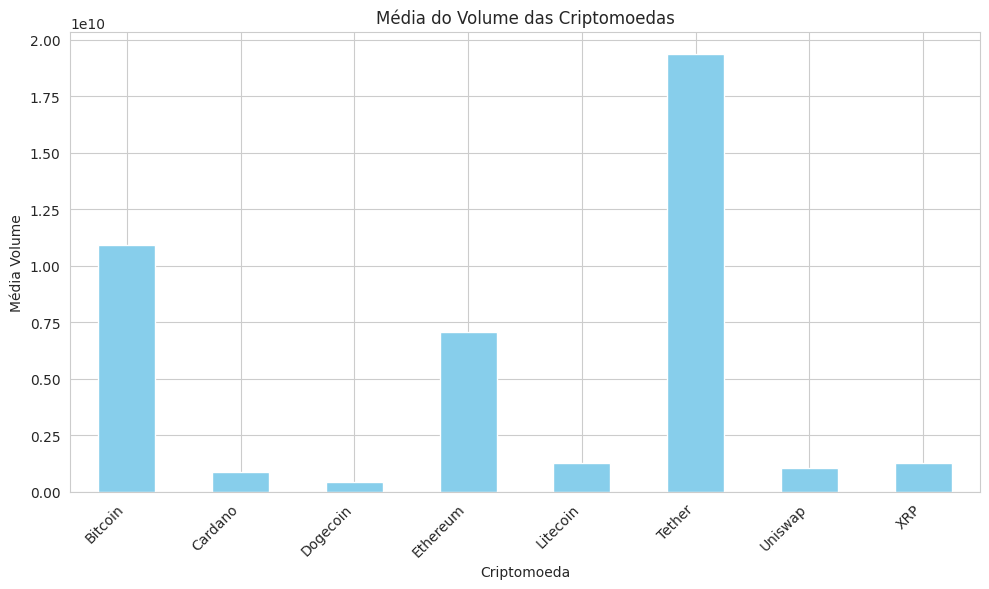

Média da soma de todas as moedas ao longo do tempo


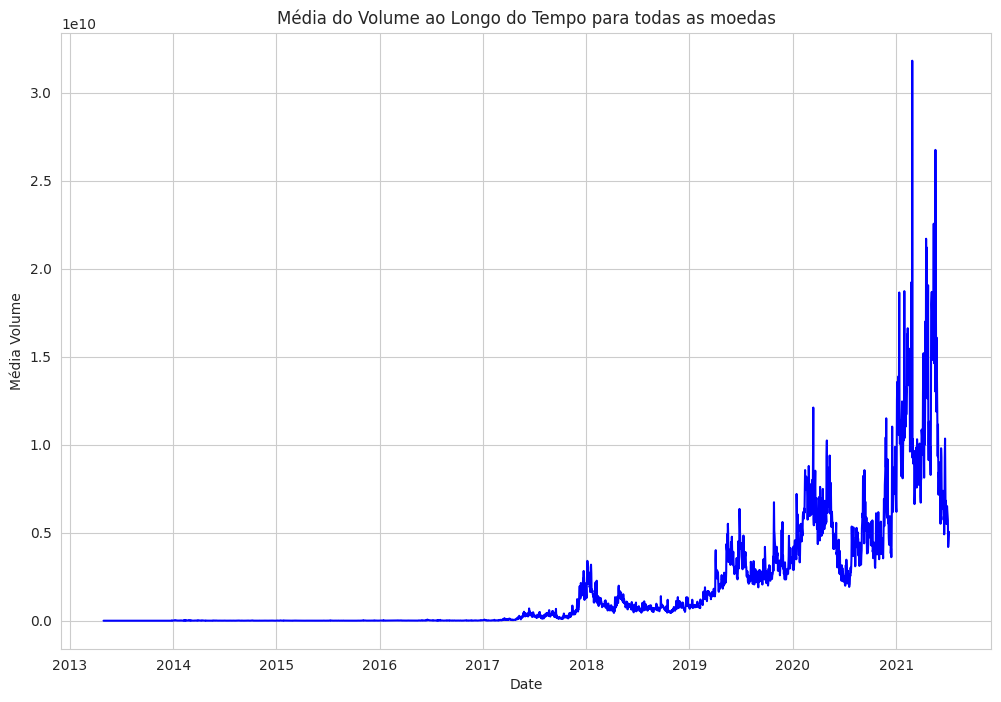

In [ ]:
# Calculando a média do volume para todas as criptomoedas
mean_volume = cryptos.groupby('Date')['Volume'].mean().reset_index()

# Definindo o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Fundo branco com linhas cinzas
sns.set_style("whitegrid")

# Plotagem da curva da média do volume ao longo do tempo
plt.plot(mean_volume['Date'], mean_volume['Volume'], color='blue')

# Adicionando rótulos e título
plt.xlabel('Date')
plt.ylabel('Média Volume')
plt.title('Média do Volume ao Longo do Tempo para todas as moedas')
plt.show()


# 3. Em quais anos houve maiores quedas e valorizações?

In [ ]:
# Encontrando o ano em que cada criptomoeda teve o maior volume
max_volume_years = cryptos.loc[cryptos.groupby('Name')['Volume'].idxmax()]

print("Ano com o maior volume para cada criptomoeda:")
print(max_volume_years[['Name', 'Year', 'Volume']])


Ano com o maior volume para cada criptomoeda:
                  Name  Year        Volume
28825             Aave  2021  2.838573e+09
13925     Binance Coin  2021  1.798295e+10
12490          Bitcoin  2021  3.509679e+11
31607          Cardano  2021  1.914198e+10
30232        Chainlink  2021  1.705493e+11
2992            Cosmos  2021  3.365948e+09
21145  Crypto.com Coin  2021  1.993686e+09
28621         Dogecoin  2021  6.941068e+10
33141              EOS  2021  2.032871e+10
16174         Ethereum  2021  8.448291e+10
16718             IOTA  2017  2.126970e+09
36017         Litecoin  2021  1.799426e+10
5438            Monero  2020  2.895912e+10
2037               NEM  2020  8.707254e+09
16494         Polkadot  2021  1.007000e+10
21683           Solana  2021  2.772225e+09
25469          Stellar  2021  1.040858e+10
23031             TRON  2021  1.397316e+10
20296           Tether  2021  2.790675e+11
9581          USD Coin  2021  8.053431e+09
25782          Uniswap  2021  6.372858e+09
37033  W

In [ ]:
# Encontrando o ano em que cada criptomoeda teve o maior volume
max_volume_years = cryptos.loc[cryptos.groupby('Name')['Volume'].idxmin()]

print("Ano com o maior volume para cada criptomoeda:")
print(max_volume_years[['Name', 'Year', 'Volume']])

Ano com o maior volume para cada criptomoeda:
                  Name  Year        Volume
28703             Aave  2020  0.000000e+00
12819     Binance Coin  2018  9.284190e+03
9630           Bitcoin  2013  0.000000e+00
30389          Cardano  2017  1.739460e+06
29275        Chainlink  2018  3.987730e+05
2291            Cosmos  2019  2.567201e+06
20430  Crypto.com Coin  2019  7.388051e+04
25943         Dogecoin  2013  0.000000e+00
31819              EOS  2017  4.556540e+06
14127         Ethereum  2015  1.021280e+05
16560             IOTA  2017  2.334640e+06
33203         Litecoin  2013  0.000000e+00
3682            Monero  2015  7.899570e+03
232                NEM  2015  6.905080e+01
16223         Polkadot  2020  4.931314e+07
21346           Solana  2020  6.520201e+05
23590          Stellar  2015  4.910920e+02
21733             TRON  2017  2.647480e+04
18098           Tether  2015  1.104970e-01
8628          USD Coin  2018  1.088030e+05
25695          Uniswap  2020  1.893552e+08
36246  W

#4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

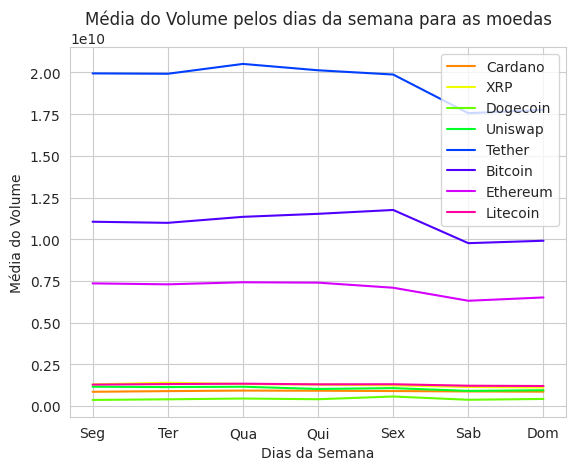

In [ ]:
# Fundo branco com linhas cinzas
sns.set_style("whitegrid")

# Definindo a paleta de cores usando a função color_palette do Seaborn
palette = sns.color_palette("hsv", len(cryptos_names))

# Plotagem da curva para cada conjunto de dados, filtrando apenas as criptomoedas especificadas
for crypto_name in cryptos_names:
    crypto_df = cryptos[cryptos['Name'] == crypto_name]
    if not crypto_df.empty:
        # Agrupando os dados por dia da semana e calculando a média do volume
        volume_by_day = crypto_df.groupby('Day_of_Week')['Volume'].mean()
        # Plotando a média do volume para cada dia da semana
        plt.plot(volume_by_day.index, volume_by_day.values, label=crypto_name, color=palette[cryptos_names.index(crypto_name)])

# Adicionando rótulos e título
plt.xlabel('Dias da Semana')
plt.ylabel('Média do Volume')
plt.title('Média do Volume pelos dias da semana para as moedas')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
plt.legend()
plt.show()

# 5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

In [ ]:
contagem_por_cripto = cryptos[['Name', 'Volume']].groupby('Name').mean()
# Encontrar a moeda com a média de volume mais alta
contagem_por_cripto
moeda_maior_media = contagem_por_cripto.loc[contagem_por_cripto['Volume'].idxmax()]
moeda_maior_media

Volume    1.938484e+10
Name: Tether, dtype: float64

In [ ]:
# Calcular a média do volume de negociação para cada moeda
media_volume = cryptos.groupby('Name')['Volume'].mean()

# Encontrar a moeda com o maior volume médio de negociação
moeda_maior_volume = media_volume.idxmax()
media_maior_volume = media_volume.max()

# Exibir a moeda com o maior volume médio de negociação
print(f"A moeda mais interessante em relação ao volume de negociação pela análise da série histórica é '{moeda_maior_volume}' com uma média de volume de negociação de {media_maior_volume:.2f}.")


A moeda mais interessante em relação ao volume de negociação pela análise da série histórica é 'Tether' com uma média de volume de negociação de 19384839322.76.


In [4]:
# Calcular a média do volume de negociação para cada moeda
media_volume = cryptos.groupby('Name')['Volume'].mean()
media_volume

NameError: name 'cryptos' is not defined

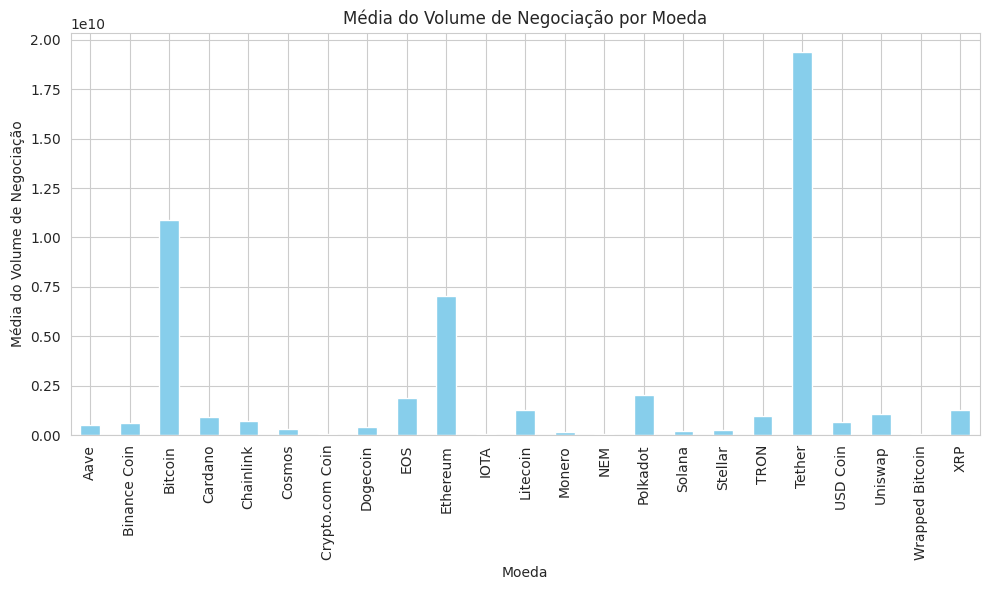

In [ ]:
import matplotlib.pyplot as plt

# Calcular a média do volume de negociação para cada moeda
media_volume = cryptos.groupby('Name')['Volume'].mean()

# Criar o gráfico de barras
media_volume.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Definir título e rótulos dos eixos
plt.title('Média do Volume de Negociação por Moeda')
plt.xlabel('Moeda')
plt.ylabel('Média do Volume de Negociação')

# Exibir o gráfico
plt.tight_layout()
plt.show()


# 6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

In [ ]:
contagem_por_cripto = cryptos[['Name', 'Volume']].groupby('Name').mean()
# Encontrar a moeda com a média de volume mais baixa
contagem_por_cripto
moeda_menor_media = contagem_por_cripto.loc[contagem_por_cripto['Volume'].idxmin()]
moeda_menor_media

Volume    4.428130e+07
Name: NEM, dtype: float64

In [ ]:
# Calcular a média do volume de negociação para cada moeda
media_volume = cryptos.groupby('Name')['Volume'].mean()

# Encontrar a moeda com o menor volume médio de negociação
moeda_menor_volume = media_volume.idxmin()
media_menor_volume = media_volume.max()

# Exibir a moeda com o menor volume médio de negociação
print(f"A moeda menos interessante em relação ao volume de negociação pela análise da série histórica é '{moeda_menor_volume}' com uma média de volume de negociação de {media_menor_volume:.2f}.")


A moeda menos interessante em relação ao volume de negociação pela análise da série histórica é 'NEM' com uma média de volume de negociação de 19384839322.76.


In [ ]:
# Calcular a média do volume de negociação para cada moeda
media_volume = cryptos.groupby('Name')['Volume'].mean()
media_volume

Name
Aave               5.023421e+08
Binance Coin       6.269804e+08
Bitcoin            1.090633e+10
Cardano            8.934183e+08
Chainlink          6.923608e+08
Cosmos             2.963413e+08
Crypto.com Coin    5.003678e+07
Dogecoin           4.326321e+08
EOS                1.888406e+09
Ethereum           7.057058e+09
IOTA               5.672587e+07
Litecoin           1.284851e+09
Monero             1.637467e+08
NEM                4.428130e+07
Polkadot           2.006507e+09
Solana             1.956751e+08
Stellar            2.515161e+08
TRON               9.459435e+08
Tether             1.938484e+10
USD Coin           6.513472e+08
Uniswap            1.061551e+09
Wrapped Bitcoin    5.547932e+07
XRP                1.260299e+09
Name: Volume, dtype: float64

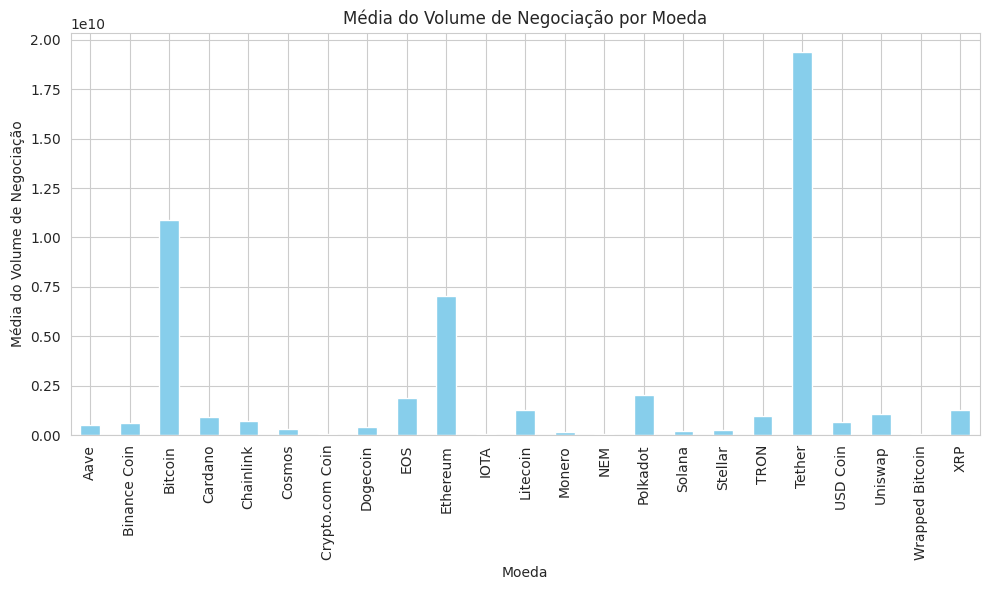

In [ ]:
import matplotlib.pyplot as plt

# Calcular a média do volume de negociação para cada moeda
media_volume = cryptos.groupby('Name')['Volume'].mean()

# Criar o gráfico de barras
media_volume.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Definir título e rótulos dos eixos
plt.title('Média do Volume de Negociação por Moeda')
plt.xlabel('Moeda')
plt.ylabel('Média do Volume de Negociação')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# 7.Existe correlação entre os valores para todas as criptomoedas?
'

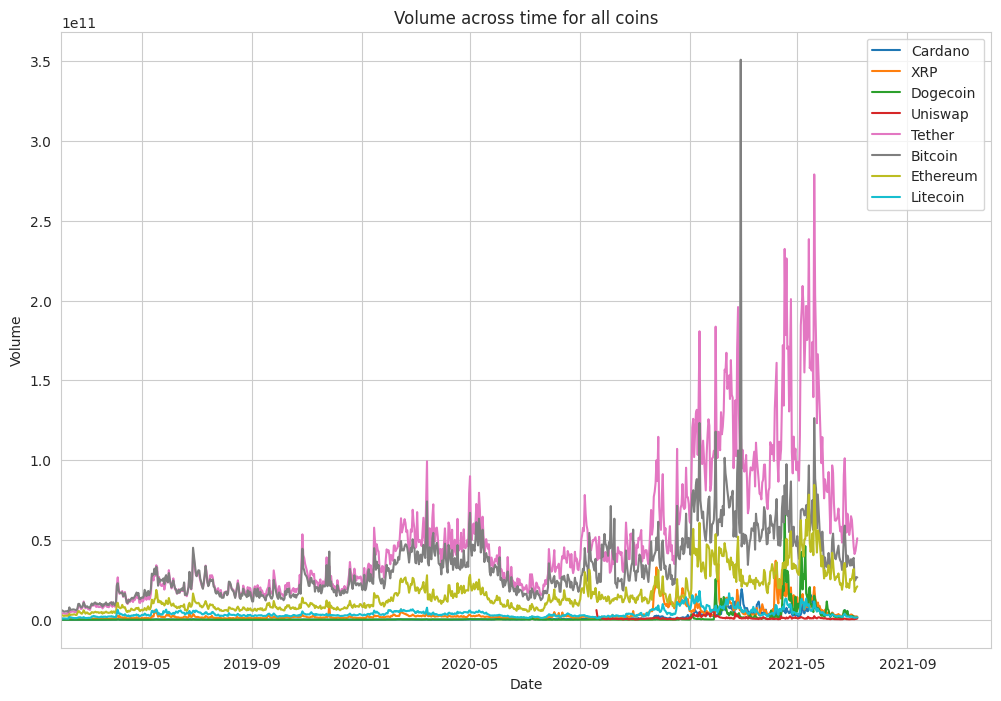

##Criação do banco de dados, conveertendo pra csv e importando

In [ ]:
# prompt: BAIXAR O DF CRYPTO PRA CSV

cryptos.to_csv('crypto.csv', index=False)
